<a href="https://colab.research.google.com/github/amnegi/Aman_Rep/blob/main/TitanicOutliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic final code for Outliers

In [2]:
import numpy as np
import pandas as pd

In [13]:
Titanic=pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Titanic.csv")
Titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [14]:
# pd.read_csv(): This is a function from the pandas library that reads a CSV file (Comma-Separated Values file)
#and loads its contents into a pandas DataFrame.
#A DataFrame is like a table in Python that helps you organize and analyze data in rows and columns.

In [15]:
#Titanic: This is the name of the variable that stores the DataFrame created by reading the Titanic CSV file.
#After this line runs, you will have the Titanic data loaded into the Titanic variable,
#allowing you to perform analysis on the dataset.

In [16]:
# Important step in the beginning
# This line of code is used to check for missing values in the Titanic dataset.
print(Titanic.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [17]:
# Performing EDA (Exploratory data analysis) on the data set
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [18]:
Titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [19]:
# Embarked where S is C' for Cherbourg, 'Q' for Queenstown, 'S' for Southampton,
#Values in head can be changed as per requirements, it can be head(), head(10)etc
Titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [20]:
Titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


Data Preprocessing for the dataset

In [22]:
#Step1 a.# Handling missing values with the mean for AGE
#The parameter inplace=True means that the operation will directly modify the original DataFrame
#rather than creating a copy of it.
Titanic['age'].fillna(Titanic['age'].mean(), inplace=True)
Titanic

<ipython-input-22-12d0ec40746e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Titanic['age'].fillna(Titanic['age'].mean(), inplace=True)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29.881138,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [24]:
#1b. #Remove rows with missing values
# dropna: The dropna() function in Python's pandas library is used to remove rows or columns with missing values,
#(NaN) from a DataFrame.
Titanic.dropna(subset=['embarked'], inplace=True)
Titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29.881138,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [25]:
# Step2.Removing Duplicates: Check for and remove duplicate rows
#in the dataset to avoid redundancy
Titanic.drop_duplicates(inplace=True)
Titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,29.881138,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [26]:
#Step3.Standardizing Data: Standardize categorical data or convert them into numerical values for easier analysis.
# A categorical variable is a type of data that can be divided into groups or categories eg. Male, Female
# titanic['Sex']: This refers to the "Sex" column in the titanic DataFrame,
#which contains categorical values like "male" and "female".
# map({'male': 0, 'female': 1}): This method is used to transform or map the categorical values in,
#the "Sex" column to numeric values based on the dictionary provided.
# Replace will also work in the same way as Map


In [28]:
Titanic['sex'] = Titanic['sex'].map({'male': 0, 'female': 1})
Titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.920000,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",1,29.881138,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",0,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


<Figure size 1400x600 with 0 Axes>

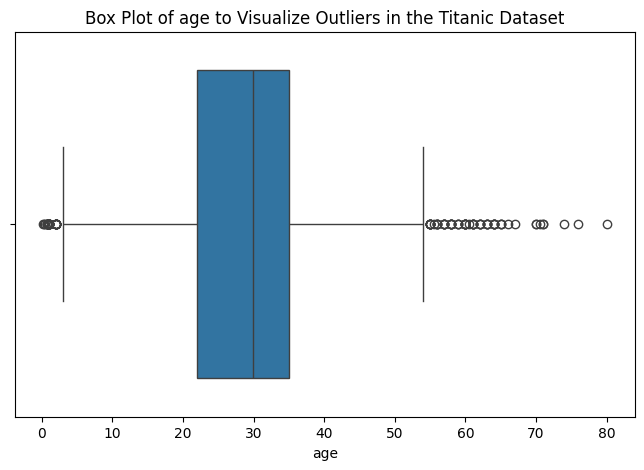

Text(0.5, 1.0, 'Box Plot of Fare to Visualize Outliers in the Titanic Dataset')

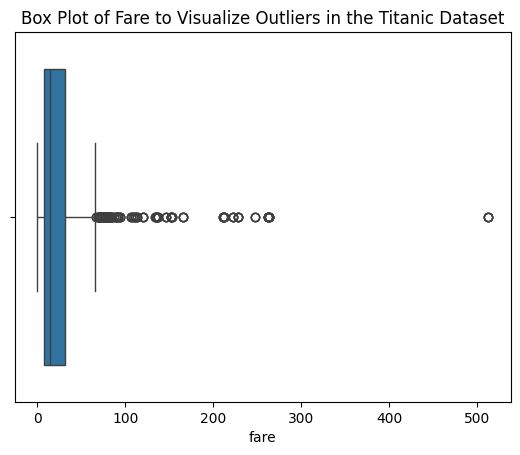

In [31]:
# Step 4a.OUTLIERS DETECTION THROUGH VISULIZATION for AGE and Fare with the help of Box plot
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for side-by-side boxplots
plt.figure(figsize=(14, 6))

# Create a box plot to visualize outliers in the 'age' column
plt.figure(figsize=(8, 5))  # Set the figure size
sns.boxplot(x=Titanic['age'])
plt.title('Box Plot of age to Visualize Outliers in the Titanic Dataset')
plt.xlabel('age')
plt.show()

# Create a box plot to visualize outliers in the 'Fare' column

sns.boxplot(x='fare', data = Titanic)
plt.title('Box Plot of Fare to Visualize Outliers in the Titanic Dataset')

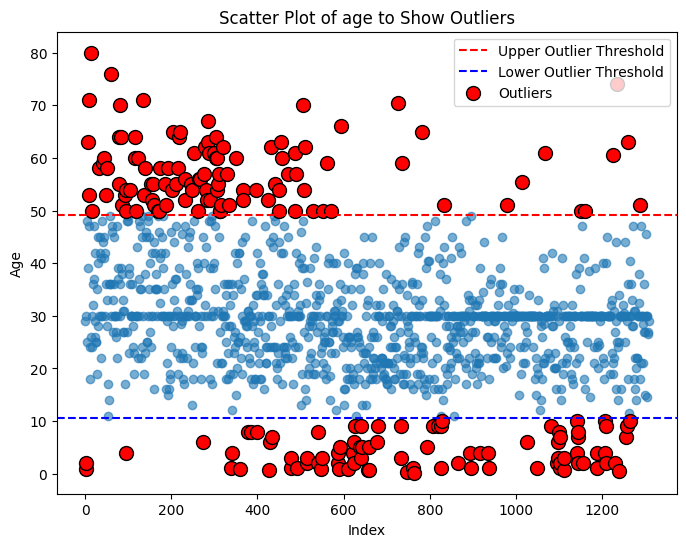

In [32]:
# Step 4b - OUTLIERS DETECTION THROUGH Visualization for AGE and Fare with the help of Scatter Plots
# sns is used for plotting
# Create a scatter plot for Age against its index
plt.figure(figsize=(8, 6))
plt.scatter(Titanic.index, Titanic['age'], alpha=0.6)

# Add a horizontal line to indicate the outlier threshold
plt.axhline(y=Titanic['age'].mean() + 1.5 * Titanic[ 'age'].std(), color='red', linestyle='--', label='Upper Outlier Threshold')
plt.axhline(y=Titanic['age'].mean() - 1.5 * Titanic['age'].std(), color='blue', linestyle='--', label='Lower Outlier Threshold')

plt.title('Scatter Plot of age to Show Outliers')
plt.xlabel('Index')
plt.ylabel('Age')

# Highlight potential outliers
outliers = Titanic[(Titanic['age'] > Titanic['age'].mean() + 1.5 * Titanic['age'].std()) |
                   (Titanic['age'] < Titanic['age'].mean() - 1.5 * Titanic['age'].std())]
plt.scatter(outliers.index, outliers['age'], color='red', label='Outliers', s=100, edgecolor='black')

plt.legend()
plt.show()

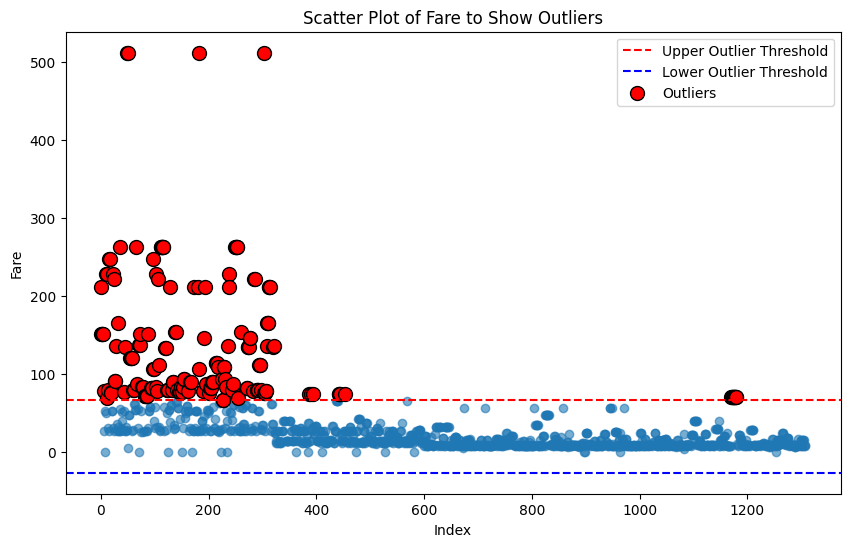

In [33]:
# Create a scatter plot for Fare against its index

plt.figure(figsize=(10, 6))
plt.scatter(Titanic.index, Titanic['fare'], alpha=0.6)

# Add a horizontal line to indicate the outlier threshold
upper_threshold = Titanic['fare'].quantile(0.75) + 1.5 * (Titanic['fare'].quantile(0.75) - Titanic['fare'].quantile(0.25))
lower_threshold = Titanic['fare'].quantile(0.25) - 1.5 * (Titanic['fare'].quantile(0.75) - Titanic['fare'].quantile(0.25))

plt.axhline(y=upper_threshold, color='red', linestyle='--', label='Upper Outlier Threshold')
plt.axhline(y=lower_threshold, color='blue', linestyle='--', label='Lower Outlier Threshold')

plt.title('Scatter Plot of Fare to Show Outliers')
plt.xlabel('Index')
plt.ylabel('Fare')

# Highlight potential outliers
outliers = Titanic[(Titanic['fare'] > upper_threshold) |
                   (Titanic['fare'] < lower_threshold)]
plt.scatter(outliers.index, outliers['fare'], color='red', label='Outliers', s=100, edgecolor='black')

plt.legend()
plt.show()

In [34]:
#Step 4c #Interpretation of Skewness Values and Visulization of Skewness:
#Skewness > 0: Right (positive) skew, with a longer tail on the right side.
#Skewness < 0: Left (negative) skew, with a longer tail on the left side.
#Skewness = 0: Symmetrical distribution.

print('skewness value of Age: ',Titanic['age'].skew())
print('skewness value of Fare: ',Titanic['fare'].skew())

skewness value of Age:  0.45411001506694093
skewness value of Fare:  4.375582424311088


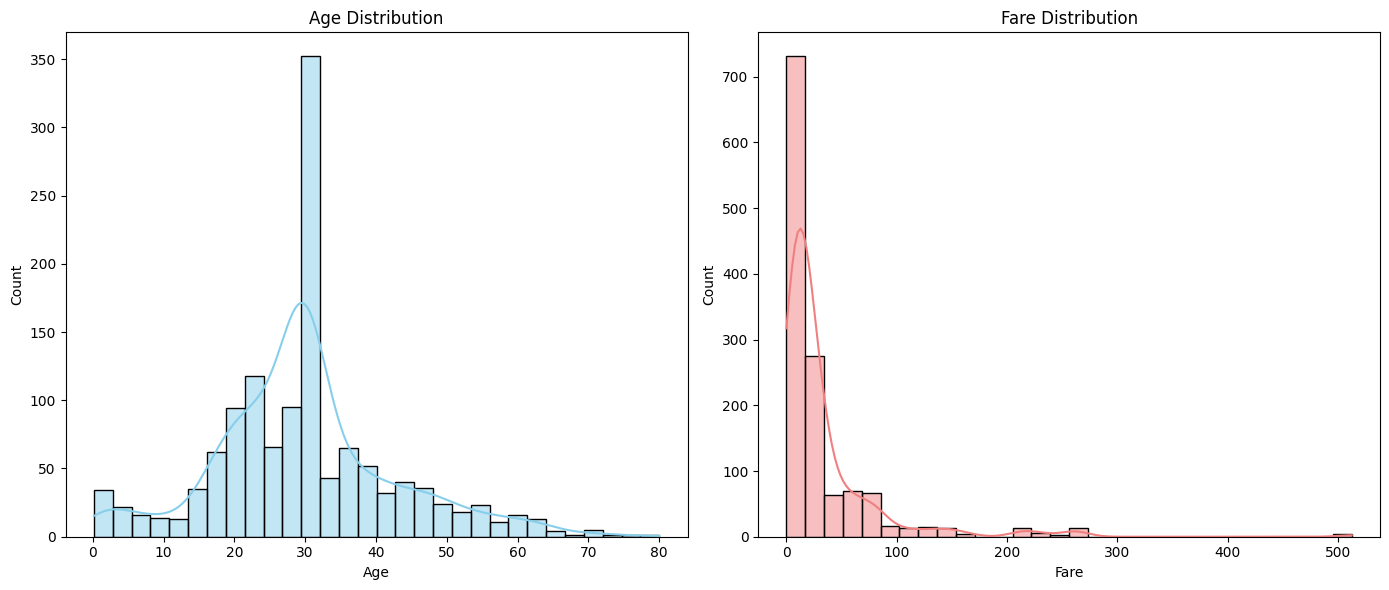

In [35]:
# Step 4d Visulization of Skewness

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(14, 6))  # Create a figure of specified size

# Histogram for Age (no .dropna() needed if there are no null values), we have already treated AGE with mean.

plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.histplot(Titanic['age'], bins=30, kde=True, color='skyblue')  # Plot directly without dropping nulls
plt.title('Age Distribution')
plt.xlabel('Age')

# Histogram for Fare

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.histplot(Titanic['fare'].dropna(), bins=30, kde=True, color='lightcoral')  # Drop NaNs for Fare if any
plt.title('Fare Distribution')
plt.xlabel('Fare')

# Adjust layout and show the plot

plt.tight_layout()
plt.show()

In [36]:
# Step 5.- Detecting Outliers Using Statistics for AGE and Fare
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Age and Fare
Q1_Age = Titanic['age'].quantile(0.25)
Q3_Age = Titanic['age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age

Q1_Fare = Titanic['fare'].quantile(0.25)
Q3_Fare = Titanic['fare'].quantile(0.75)
IQR_Fare = Q3_Fare - Q1_Fare

# Define bounds for outliers in Age and Fare
lower_bound_Age = Q1_Age - 1.5 * IQR_Age
upper_bound_Age = Q3_Age + 1.5 * IQR_Age

lower_bound_Fare = Q1_Fare - 1.5 * IQR_Fare
upper_bound_Fare = Q3_Fare + 1.5 * IQR_Fare

# Filter the DataFrame to remove rows with outliers in either Age or Fare
Titanic_no_outliers = Titanic[
    (Titanic['age'] >= lower_bound_Age) & (Titanic['age'] <= upper_bound_Age) &
    (Titanic['fare'] >= lower_bound_Fare) & (Titanic['fare'] <= upper_bound_Fare)
]

# Display the number of rows in the new DataFrame after removing outliers
print(f"Number of rows after removing outliers in Age and Fare: {len(Titanic_no_outliers)}")

Number of rows after removing outliers in Age and Fare: 1062


In [37]:
# A new Dataframe is created as Titanic_no_outliers, without any outliers in age and fare

Titanic_no_outliers

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
5,1,1,"Anderson, Mr. Harry",0,48.000000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
7,1,0,"Andrews, Mr. Thomas Jr",0,39.000000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",1,53.000000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
15,1,0,"Baumann, Mr. John D",0,29.881138,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
20,1,1,"Beckwith, Mr. Richard Leonard",0,37.000000,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",1,29.881138,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",0,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


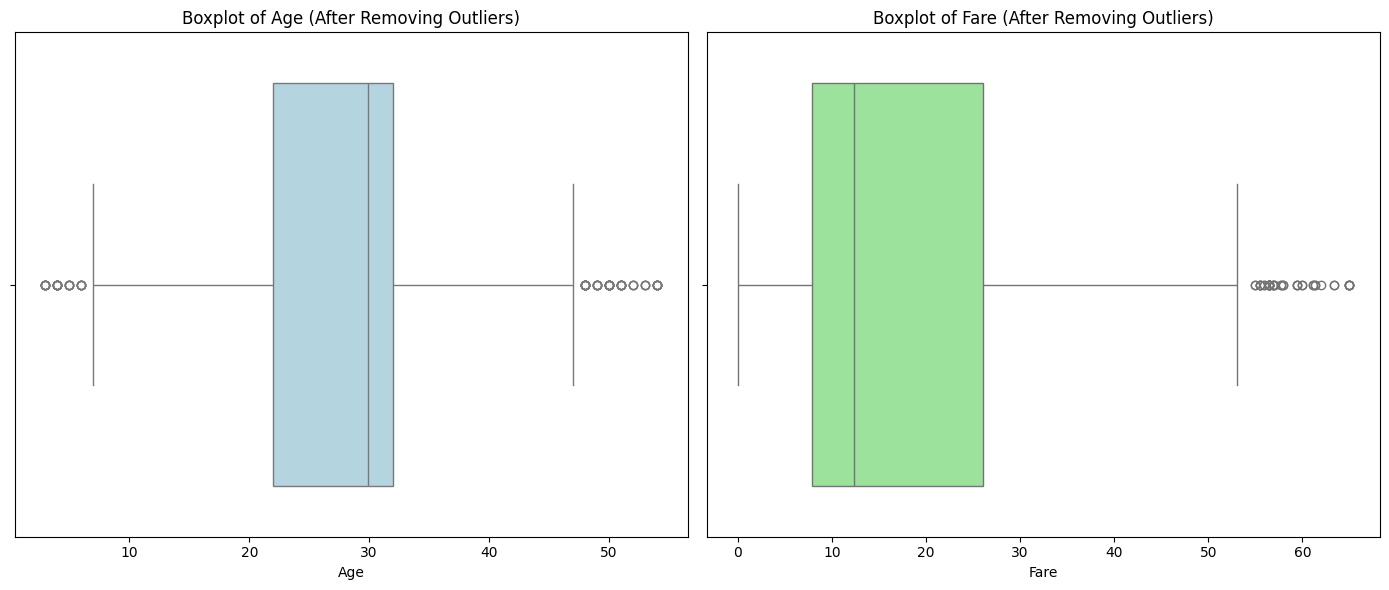

In [38]:
# Step 6 - Visualization performed for the 2 nd time after removing outliers from age and Fare through BOXPLOTS
# Set up the figure for side-by-side boxplots
plt.figure(figsize=(14, 6))

# Boxplot for Age
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.boxplot(x=Titanic_no_outliers['age'], color='lightblue')
plt.title('Boxplot of Age (After Removing Outliers)')
plt.xlabel('Age')

# Boxplot for Fare
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.boxplot(x=Titanic_no_outliers['fare'], color='lightgreen')
plt.title('Boxplot of Fare (After Removing Outliers)')
plt.xlabel('Fare')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

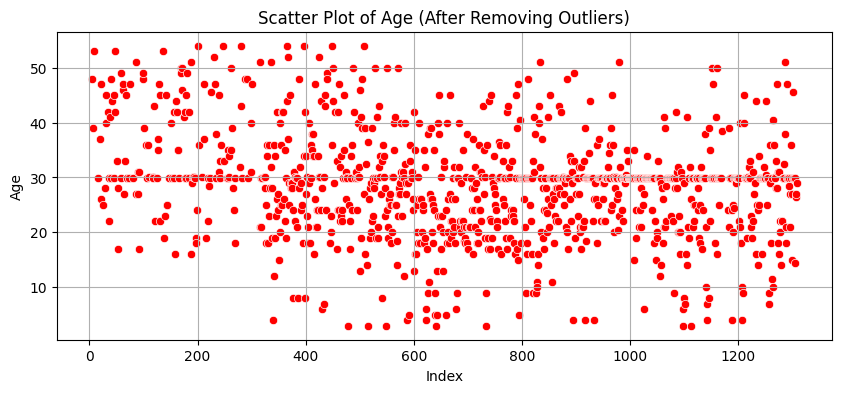

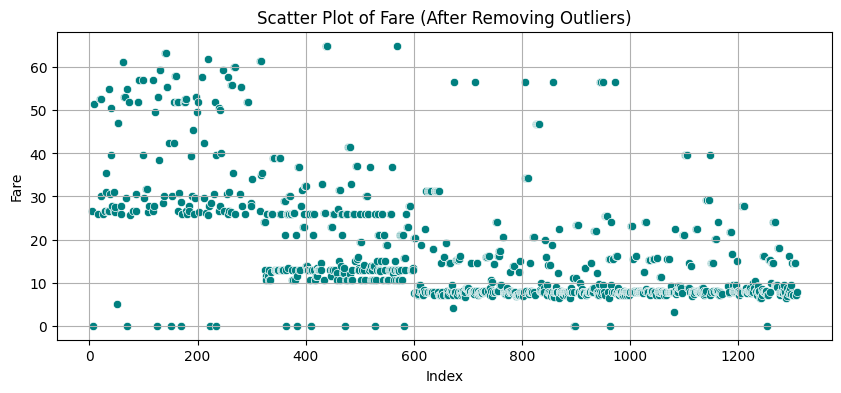

In [39]:
# Step 6 - Visualization performed for the 2 nd time after removing outliers from age and Fare through Scatterplot
# Scatter plot for Age only
plt.figure(figsize=(10, 4))
sns.scatterplot(x=Titanic_no_outliers.index, y='age', data=Titanic_no_outliers, color='red')  # Changed color to red
plt.title('Scatter Plot of Age (After Removing Outliers)')
plt.xlabel('Index')
plt.ylabel('Age')
plt.grid(True)
plt.show()

# Scatter plot for Fare only
plt.figure(figsize=(10, 4))
sns.scatterplot(x=Titanic_no_outliers.index, y='fare', data=Titanic_no_outliers, color='teal')  # Changed color to teal
plt.title('Scatter Plot of Fare (After Removing Outliers)')
plt.xlabel('Index')
plt.ylabel('Fare')
plt.grid(True)
plt.show()